O governo do canadá pediu a ajuda para nossa consultoria Sirius contruir uma IA que consiga fazer a predição da emissão de CO2 na atmosfera considerando algumas características dos carros. Portanto, com a construção dessa IA o governo conseguirá focar em questões relacionadas a melhoria da qualidade do ar.
Para a resolução deste exercício você precisará responder várias questões.



Aqui uma breve descrição de todas as variáveis disponíveis no dataset:

**Variáveis**
Tota de variáveis: 12

Lingua: Inglês

`Make:`	        Empresa que fez o veículo

`Model:`	        Modelo do carro. (4WD/4X4 = Tração nas quatro rodas, AWD = Tração nas quatro rodas, FFV = Veículo de combustível flexível, SWB = Distância entre eixos curta, LWB = Distância entre eixos longa, EWB = Distância entre eixos estendida)

`Vehicle Class: `  Classe do veiculo, dependendo da utilidade, capacidade e peso

`Engine Size(L):`  Tamanho do motor usado em litros.

`Cylinders:`      Número de cilindros

`Transmission:`   Tipo de transmissão com número de engrenagens. (A = Automático, AM = Manual automatizado, AS = Automático com mudança de seleção, AV = Variável continuamente, M = Manual e valores de 3 - 10 = Número das engrenagens.)

`Fuel Type:`           Tipo de combustível usado. (X = Gasolina normal, Z = Gasolina premium, D = Diesel, E = Etanol (E85), N = Gás natural)

`Fuel Consumption City (L/100 km):`           Consumo de combustível nas estradas da cidade (L / 100 km)

`Fuel Consumption Hwy (L/100 km):`            Consumo de combustível em rodovias (L / 100 km)

`Fuel Consumption Comb (L/100 km):`         O consumo de combustível combinado (55% cidade, 45% rodovia) é mostrado em L / 100 km

`Fuel Consumption Comb (mpg):`       O consumo de combustível combinado na cidade e na rodovia é mostrado em milhas por galão (mpg)

`CO2 Emissions(g/km): `    As emissões de dióxido de carbono do tubo de escape (em gramas por quilômetro) para condução combinada em cidade e rodovia


Ao longo desse exercícios vamos tentar responder a perguntas como:

1.   Quais variáveis mais impactam na emissão de CO2?
2.   Considerando os principais algoritmos de regressão, quais apresentam melhor resultado das métricas R2 e MSE?
O que você poderia fazer para melhorar os valores das métricas do melhor
1.   O que você poderia fazer para melhorar os valores das métricas do melhor algoritmo?

In [1]:
#Questão 1
#Faça as importações necessárias
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder



# Questão 2
#carregue os dados do arquivo csv

In [2]:

df =pd.read_csv('CO2 Emissions_Canada.csv')
df.head(2)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221


# Questão 3
#verifique as informações (info) do dataset e o seu formato (shape) e a sua descrição

In [3]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

# Questão 4
#Visualizando a disperção das variáveis em relação a emissão de CO2\
#dica: use o pairplot para plotar todas de uma vez

Text(0.5, 1.05, 'Disperção entre as variaveis')

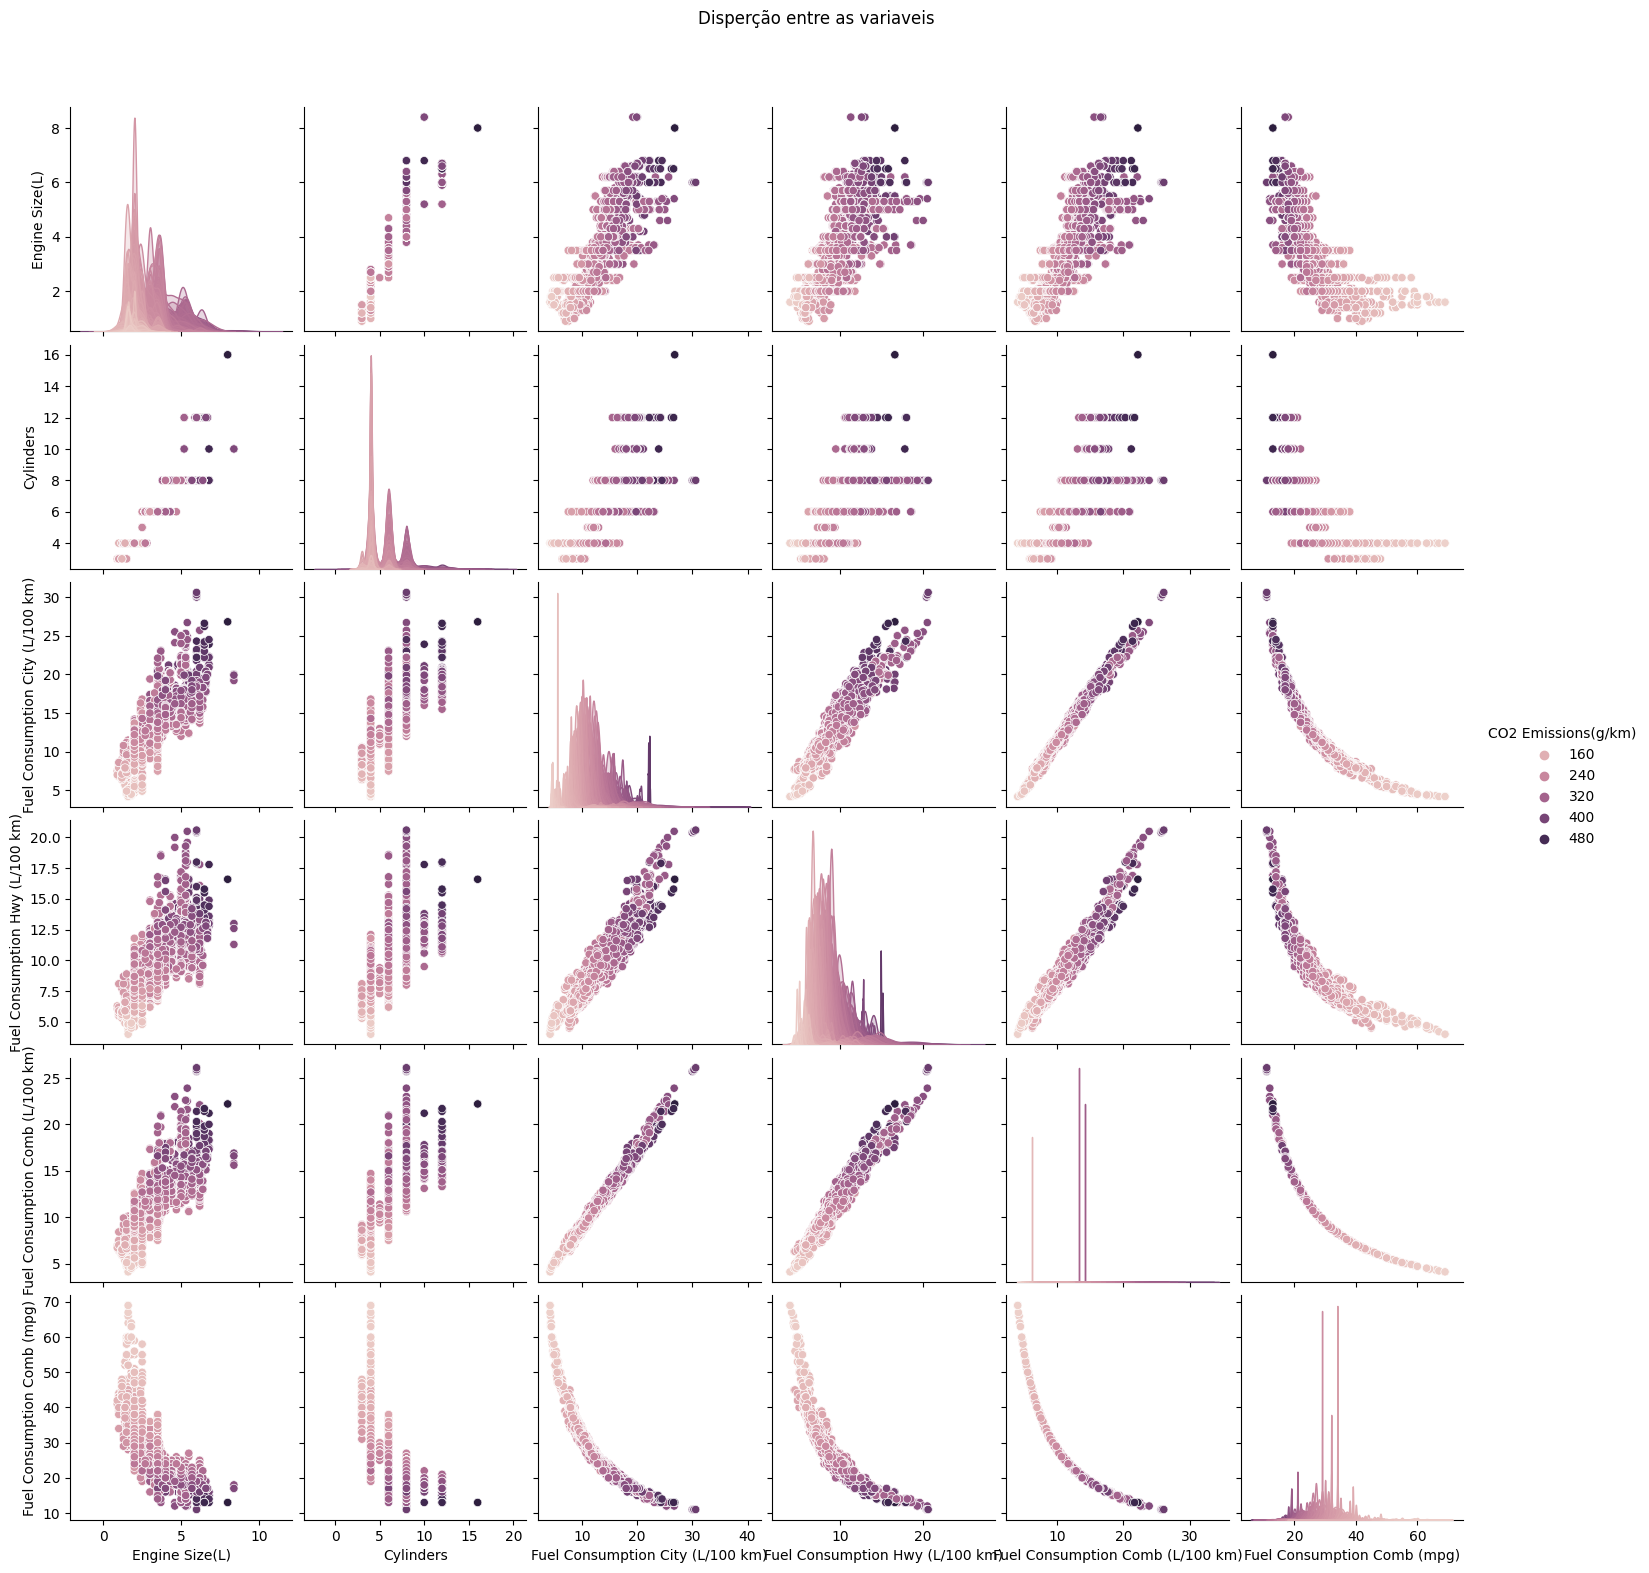

In [5]:

ax = sns.pairplot(df, hue="CO2 Emissions(g/km)")
ax.fig.suptitle('Disperção entre as variaveis',y=1.05)


In [6]:
fig = px.box(df, y="CO2 Emissions(g/km)",)
fig.show()

# Questão 6
#visualize a correlação entre as variáveis\
#dica: será que um heatmap pode ajudar a gente aqui?

C:\Users\leolk\AppData\Local\Temp\ipykernel_1216\2264866656.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



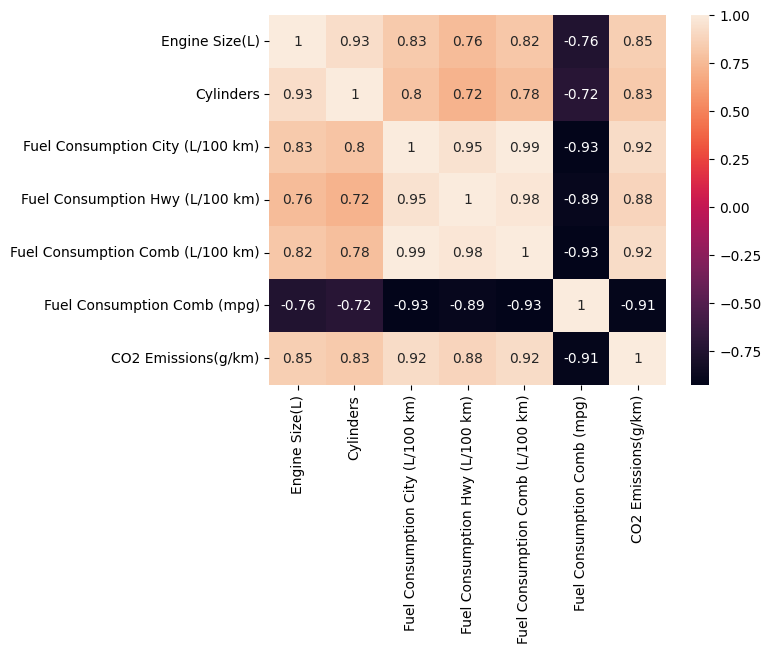

In [7]:
sns.heatmap(df.corr(),annot=True);

# Questão 7
#Transforme as variáveis categóricas em númericas usando o Pandas ou sckitlearn\
#após a transformação, garanta que os novos valores estão no dataset (talvez você precise usar `copy` `concat` )\
#não se esqueça de apagar as variáveis antigas `drop`\
#você aqui pode querer rodar tudo duas vezes! Uma vez SEM as variáveis categóricas (apenas as remova do dataset) e a segunda vez transformando as variáveis categóricas
#qual versão irá se sair melhor? Porque você acha isso?

In [8]:
object_columns = df.select_dtypes(include=['object']).columns

In [9]:
df_t = df.copy()

In [10]:
encoder = OneHotEncoder(sparse=False)

X_encoded = pd.DataFrame(encoder.fit_transform(df_t[object_columns]))
X_encoded.columns = encoder.get_feature_names(object_columns)
df_t.drop(object_columns,axis=1, inplace=True)
df_t = pd.concat([df_t, X_encoded ], axis=1)

c:\Users\leolk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



# Questão 8
#Defina X e y e separa 20% dos dados para test

In [11]:
X = df_t.drop(columns=['CO2 Emissions(g/km)'])
y = df_t['CO2 Emissions(g/km)']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Questão 9
#Antes de começarmos a treinar nossos modelos, que tal criar uma funcão que recebe 2 parâmetros: o valor previsto pelo modelo e o resultado real.\
#Com base nesse 2 valores, a funcão calcula e imprime o R2, MSE e MAE

In [13]:
def evaluate_r2_mse_mae(y_pred,y_true):
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error

    r2 = r2_score(y_true, y_pred)    
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)

    return print(f'R² = {r2}\nMSE = {mse} (Mean Square Error)\nMAE = {mae} (Mean Absolute Error)')
    

In [14]:
#Quais variáveis tem mais importância pro nosso modelo?
#vamos usar o código abaixo para criar uma função que exiba as 10 variáveis que tem mais peso na predição do modelo
#Você consegue entender o que essa função está fazendo?
def feature_importance(modelo,df_copia):
    importances = pd.Series(data=modelo.feature_importances_, index=df_copia.drop(columns=['CO2 Emissions(g/km)']).columns)
    importances.sort_values(ascending=False, inplace=True) #ordenando as variáveis
    sns.barplot(x=importances[:10], y=importances.index[:10], orient='h').set_title('Importância de cada feature')


#Escolha um modelo de regressão de sua preferência mais o Decision Tree, Random Forest e o XGBoost para treinar e testar.\
#Para os 3 últimos (DT, RF e  XGB) calcule quais as features mais importantes usando a função que acabamos de criar\
#Para cada um deles responda:
1. - Como foram as métricas de avaliação do modelo?
2. - Para os 3 últimos, responda: Quais features foram as mais importantes para o modelo?

# Questão 10 - Modelo 1 - a sua escolha


In [15]:
from sklearn.svm import SVR
modeloSVR = SVR(epsilon=0.2)
modeloSVR.fit(X_train, y_train)

SVR(epsilon=0.2)

In [16]:
y_prev = modeloSVR.predict(X_test)

In [17]:
evaluate_r2_mse_mae(y_prev,y_test)

R² = 0.8817358871137974
MSE = 406.78448483887524 (Mean Square Error)
MAE = 9.547740103449708 (Mean Absolute Error)


# Questão 11 - Modelo 2 - Decision Tree

In [18]:

from sklearn.tree import DecisionTreeRegressor
modeloDTR = DecisionTreeRegressor(max_depth=5)
modeloDTR.fit(X_train, y_train)
y_prev = modeloDTR.predict(X_test)
evaluate_r2_mse_mae(y_prev,y_test)

R² = 0.9819299655219429
MSE = 62.15418597229207 (Mean Square Error)
MAE = 5.59995048506248 (Mean Absolute Error)


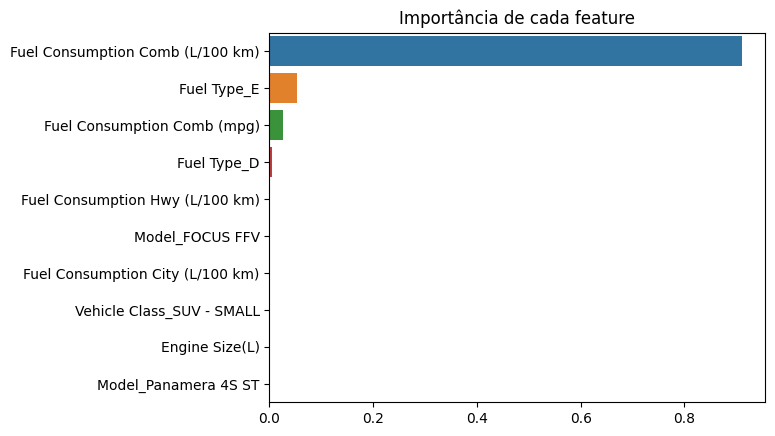

In [23]:
feature_importance(modeloDTR,df_t)

# Questão 12 - Modelo 3 - Random Forest


In [19]:
from sklearn.ensemble import RandomForestRegressor
modeloRFR = RandomForestRegressor(max_depth=5, random_state=0)
modeloRFR.fit(X_train, y_train)
y_prev = modeloRFR.predict(X_test)
evaluate_r2_mse_mae(y_prev,y_test)

R² = 0.9891949215051721
MSE = 37.16544420699739 (Mean Square Error)
MAE = 3.9367844032882355 (Mean Absolute Error)


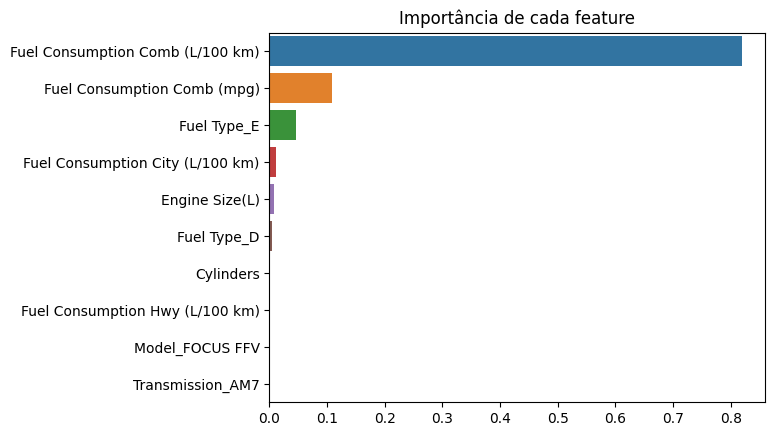

In [24]:
feature_importance(modeloRFR,df_t)

# Questão 13 - XGBoost


In [20]:
import xgboost as xg
modeloXGB = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
modeloXGB.fit(X_train, y_train)
y_prev = modeloXGB.predict(X_test)
evaluate_r2_mse_mae(y_prev,y_test)

[23:21:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
R² = 0.9790043529901004
MSE = 72.21720304112043 (Mean Square Error)
MAE = 7.2275117526767865 (Mean Absolute Error)


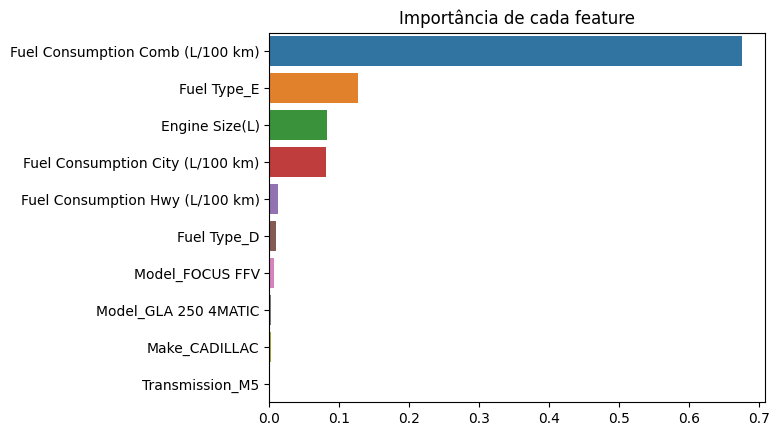

In [25]:
feature_importance(modeloXGB,df_t)

# Questão 14
#Você consegue alterar os parâmetros do XGBoost para que ele alcance um resultado melhor?

In [28]:
modeloXGB = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
modeloXGB.fit(X_train, y_train)
y_prev = modeloXGB.predict(X_test)
evaluate_r2_mse_mae(y_prev,y_test)

[23:26:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
R² = 0.9959034540862437
MSE = 14.09059162985182 (Mean Square Error)
MAE = 2.0476515504582635 (Mean Absolute Error)


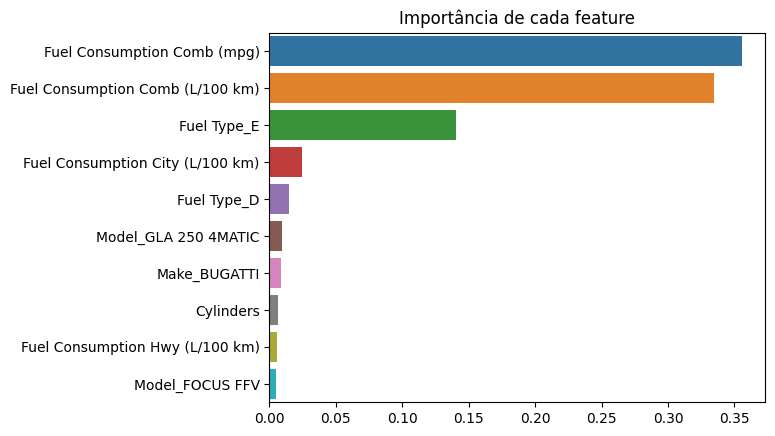

In [29]:
feature_importance(modeloXGB,df_t)